# Aprendizado Profundo ou Deep Learning 

## O que é:
Deep learning é uma subárea da inteligência artificial (IA) e do machine learning (aprendizado de máquina) que se concentra no uso de redes neurais artificiais profundas para resolver problemas complexos.

## Como funciona:
O deep learning utiliza redes neurais profundas para processar os dados. Essas redes consistem em neurônios artificiais organizados em camadas interconectadas.

Cada camada recebe informações da anterior, transforma-as de acordo com parâmetros aprendidos durante o treinamento e passa os resultados adiante.

O treinamento de uma rede neural é feito usando algoritmos de aprendizado, como o backpropagation (retropropagação), que ajusta os pesos das conexões entre os neurônios para minimizar os erros entre as previsões do modelo e os resultados reais. 

## Diferença entre machine learning e deep learning:
→ Machine learning convencional geralmente depende da extração manual de recursos (informações sobre o problema). 

→ Deep learning elimina a necessidade de extrair manualmente características dos dados.

## Diferença entre deep learning e redes neurais:
→ Redes neurais são o conceito fundamental, representando um modelo matemático inspirado no 
funcionamento do cérebro humano.

→ Deep learning é uma aplicação específica das redes neurais, que utiliza muitas camadas para realizar aprendizado profundo.

⚠️ toda técnica de deep learning utiliza redes neurais, mas nem toda rede neural é usada em deep learning.

## Tipos de algoritmos de deep learning:
* Redes neurais convolucionais (CNN) → p/ imagens (reconhecimento facial, detecção de objetos e análise de imagens médicas)
* Redes neurais recorrentes (RNN) → p/ palavras (séries temporais, texto ou áudio)
* Redes adversárias generativas (GAN) → p/ deepfakes (imagens, vídeos, músicas ou textos)
* Modelos de difusão → p/ geração (imagens, áudio e até design molecular)
* Modelos transformadores → p/ ChatGPT e Google Gemini (sequências de dados, como texto, áudio e séries temporais)

## Por que usar o deep learning?
→ Para analisar dados não estruturados com eficiência: 
* Machine learning é comum trabalharmos com dados estruturados, tabelas com informações organizadas por colunas.
* Deep learning se destaca por sua habilidade de lidar com dados não estruturados, como imagens, áudios, textos e vídeos, que representam a maior parte das informações disponíveis no mundo real.

## Referências:
* https://www.alura.com.br/artigos/deep-learning?srsltid=AfmBOooSLdvjpGMPscvEjYUV2DSGTaYsRP7lAXVjKxTWwcF0tL8dnmP1
* https://didatica.tech/introducao-a-redes-neurais-e-deep-learning/#:~:text=Deep%20Learning%20x%20Redes%20Neurais&text=Conforme%20j%C3%A1%20mencionamos%2C%20o%20deep,n%C3%A3o%20estamos%20utilizando%20deep%20learning.






### Importar Bibliotecas

In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

### Obter os dados e já dividi-los em treinamento e teste automaticamente


In [2]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data() 


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Exibir um item da base de dados

Text(0.5, 1.0, '0')

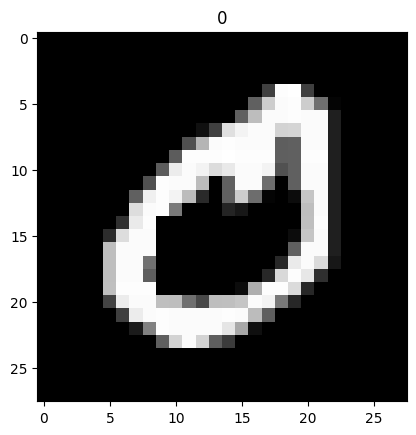

In [3]:
plt.imshow(X_treinamento[21], cmap='gray')
plt.title(y_treinamento[21])

### Mudar dimensão para 784 (original está em 28x28)
Seguir as etapas de transformação de ↑→ para →, que são comuns no pré-processamento de dados para tarefas de aprendizado profundo, especialmente quando se trabalha com imagens. 


Na base de dados que está armazenada na variável `X_treinamento`

Passo 1: Entender a distribuição dos dados

In [4]:
print("Forma: ", X_treinamento.shape)
print("Qtd linhas: ", len(X_treinamento))
print("Qtd colunas: ", X_treinamento.shape[1:])

Forma:  (60000, 28, 28)
Qtd linhas:  60000
Qtd colunas:  (28, 28)


Passo 2: Redimensionamento dos dados (reshape):

**Por que fazer isso?**

Em muitos modelos de aprendizado profundo, especialmente redes neurais densas (totalmente conectadas), a entrada precisa ser um vetor unidimensional. Imagens, por outro lado, são dados multidimensionais (largura, altura e canais de cor).

O reshape transforma cada imagem em um longo vetor, "achatando" a matriz multidimensional em um vetor unidimensional. Isso torna os dados compatíveis com a camada de entrada da rede neural.

np.prod(X_treinamento.shape[1:]) calcula o número total de elementos em todas as dimensões, exceto a primeira (que geralmente representa o número de amostras). 

Isso garante que o vetor resultante tenha o tamanho correto.Transformar de uma imagem quadrada ↑→ para uma imagem linha →

In [5]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
#X_treinamento.shape[1:] → Pega todas as dimensões depois da primeira. No caso (60000, 28, 28), isso retorna (28, 28).
#np.prod((28, 28)) → Multiplica 28 × 28 = 784. Isso significa que cada imagem de 28×28 será achatada em um vetor de 784 elementos.
#reshape → Isso transforma cada imagem 28×28 em um vetor unidimensional de 784 valores (achatando os dados), mantendo o mesmo número de amostras (60000).

#Observação: Se estivéssemos lidando com imagens coloridas (RGB 28×28×3), o código adaptaria automaticamente para 28×28×3 = 2352 entradas.

X_treinamento[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Passo 3: Conversão para float32 (para possibilitar a normalização [de 0 a 1] dos dados)

**Por que fazer isso?**

A normalização [de 0 a 1], que vem na próxima etapa, envolve dividir os valores dos pixels por 255. 

Essa divisão requer que os dados sejam do tipo float (número de ponto flutuante) para evitar arredondamentos indesejados.

float32 é um tipo de dado de ponto flutuante de 32 bits, que oferece precisão suficiente para a maioria das aplicações de aprendizado profundo.

In [6]:
X_treinamento = X_treinamento.astype('float32')
X_treinamento[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Passo 4: Normalizar os dados (255 é o valor máximo de um pixel)

**Por que fazer isso?**

A normalização é uma técnica crucial para melhorar o desempenho e a estabilidade do treinamento de redes neurais.

Dividir os valores dos pixels por 255 escala os dados para o intervalo de 0 a 1. 

Isso garante que todos os recursos (pixels) tenham uma escala semelhante, o que facilita o aprendizado da rede.

A normalização ajuda a evitar que grandes valores de entrada dominem o processo de treinamento e pode acelerar a convergência do modelo.

In [7]:
X_treinamento /= 255  #Divide por 255 para normalizar os valores entre 0 e 1
X_treinamento[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Passo 5: Transformar as 10 classes de saída da variável `y_treinamento` para dummies variables (one-hot encoding):


**Por que fazer isso?**

Em tarefas de classificação multiclasse, como a classificação de dígitos (onde você tem 10 classes ), a variável de destino (rótulos) precisa ser representada de forma adequada para a rede neural.

to_categorical realiza o one-hot encoding, que transforma cada rótulo em um vetor binário. Por exemplo, o rótulo "3" seria transformado em um vetor com 10 elementos, onde o quarto elemento é 1 e os demais são 0.

* [0, 1, 2, **3**, 4, 5, 6, 7, 8 e 9]
* [0, 0, 0, **1**, 0, 0, 0, 0, 0 e 0]

Essa representação permite que a rede neural produza probabilidades para cada classe e facilita o cálculo da função de perda durante o treinamento.

In [8]:
y_treinamento = to_categorical(y_treinamento, 10)
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Fazer o mesmo na base de dados que está armazenada na variável `X_teste`

Passo 1: Entender a distribuição dos dados

In [9]:
print("Forma: ", X_teste.shape)
print("Qtd linhas: ", len(X_teste))
print("Qtd colunas: ", X_teste.shape[1:])

Forma:  (10000, 28, 28)
Qtd linhas:  10000
Qtd colunas:  (28, 28)


Passo 2:  Redimensionamento dos dados (reshape)

In [10]:
#Faz a mesma coisa com a base acima, porém com a partição de teste
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Passo 3: Conversão para float32



In [11]:
X_teste = X_teste.astype('float32')
X_teste[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Passo 4: Normalização dos dados

In [12]:
X_teste /= 255  #Divide por 255 para normalizar os valores entre 0 e 1
X_teste[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Passo 5: Transformação das classes em dummies variables (one-hot encoding)

In [13]:
y_teste = to_categorical(y_teste, 10)
y_teste[0]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Criar a estrutura da rede neural:
`Entrada (784)` → `Camada oculta (64)` → `Camada oculta (64)` → `Camada oculta (64)` → `Saída (10)`


* 3 camadas ocultas com 64 neurônios cada e ativação ReLU.
* Dropout (20%) é utilizado para zerar o um percentual de neurônios após cada camada oculta para evitar overfitting.
* Camada de saída com 10 neurônios e ativação Softmax, ideal para classificação multiclasse.

In [14]:
# Armazena na variável o modelo Sequencial (feedforward), onde as camadas são adicionadas uma após a outra (em sequência)
modelo = Sequential() 

modelo.add(Dense(units = 64, # Adiciona uma camada densa totalmente conectada com 64 neurônios
                 activation = 'relu', # ReLU (Rectified Linear Unit 𝑓(𝑥)=max⁡(0,𝑥) melhora o aprendizado e evita saturação como o sigmoid (vanishing gradient)
                 input_dim = 784)) # Entrada tem 784 neurônios (útil para imagens 28×28 achatadas)
modelo.add(Dropout(0.2)) # Zera aleatoriamente 20% dos neurônios durante o treinamento evitando overfitting (forçando a rede a não depender excessivamente de neurônios específicos)

modelo.add(Dense(units = 64, activation = 'relu')) # Outra camada densa com 64 neurônios e ativação ReLU
modelo.add(Dropout(0.2)) # Dropout aplicado novamente para regularizar a rede

modelo.add(Dense(units = 64, activation = 'relu')) # Igual
modelo.add(Dropout(0.2)) # Igual

modelo.add(Dense(units = 10, activation = 'softmax')) # Camada com 10 neurônios, pois temos 10 classes (dígitos de 0 a 9)
# A função softmax converte os valores em probabilidades, garantindo que a soma seja 1, permitindo que o modelo escolha a classe (de 0 a 9) com maior probabilidade

C:\Users\Gui\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Resumo da arquitetura da rede neural gerado pelo comando modelo.summary():

In [15]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Explicação:

1. **Modelo:** sequential_1
   * Modelos sequenciais são uma pilha linear de camadas, onde cada camada tem exatamente um tensor de **entrada** e um tensor de **saída**:  
     * `Entrada (784)`** → `Densa (64)` → `Dropout (0.2)` → `Densa (64)` → `Dropout (0.2)` → `Densa (64)` → `Dropout (0.2)` → **`Saída (10)`**

2. **Layer (type)** - Camadas: 
* **Dense:** `dense_4`, `dense_5`, `dense_6`, `dense_7`
  * Essas são camadas densas (ou totalmente conectadas). Em uma camada densa, cada neurônio está conectado a todos os neurônios da camada anterior.
  * Cada camada densa realiza uma transformação linear nos dados de entrada, seguida por uma função de ativação (que não é mostrada aqui, mas é crucial).
  * As camadas densas são responsáveis por aprender padrões complexos nos dados.
  * Como os parâmetros são calculados: Cada camada Densa (Dense) tem dois tipos de parâmetros treináveis
    * Pesos (weights): Cada conexão entre os neurônios.
    * Vieses (biases): Um valor adicional para cada neurônio.
  * A fórmula para calcular o número total de parâmetros em uma camada densa é: 
    * $Parâmetros=(neurônios da camada anterior * neurônios da camada atual) + neurônios da camada atual$
* **Dropout:** `dropout_3`, `dropout_4`, `dropout_5`
  * O dropout é uma técnica de regularização que desativa aleatoriamente uma fração dos neurônios durante o treinamento.
  * Isso ajuda a prevenir o overfitting (quando o modelo se ajusta demais aos dados de treinamento e não generaliza bem para novos dados).

3. **Output Shape** - Formato de Saída
  * `(None, 64)` significa que a saída de cada uma das primeiras camadas densas e dropout tem esse formato 
    * `None` representa o tamanho do lote (batch size), que pode variar.
    * `64` indica que cada camada densa tem 64 neurônios.
   * `(None, 10)` na camada de saída (`dense_7`) tem 10 neurônios, o que sugere que este modelo está sendo usado para uma tarefa de classificação com 10 classes.

4. Param # - Parâmetros
  * **Cálculo dos valores exibidos:** esses números representam a quantidade de parâmetros (pesos e bias) em cada camada densa
    *  1️⃣ Primeira camada densa (`dense_4`): $(784×64)+64=50.240$
    *  2️⃣ Segunda camada densa (`dense_5`): $(64×64)+64=4.160$
    *  3️⃣ Terceira camada densa (`dense_6`): $(64×64)+64=4.160$
    *  4️⃣ Camada de saída (`dense_7`): $(64×10)+10=650$
    *  ✅ Total de parâmetros treináveis = $59.210$
   * As camadas de dropout não possuem parametros treinaveis, dessa forma o parametro é $0$.
   * Quanto mais parâmetros, mais complexo é o modelo.

### Configurar os parâmetros da rede neural e treiná-la utilizando a base de dados de validação

In [16]:
modelo.compile(optimizer='adam', # Otimizador Adam é uma variação do gradiente descendente que se adapta à taxa de aprendizado
               loss='categorical_crossentropy', # Função de perda para classificação multiclasse
               metrics=['accuracy']) # Métrica para avaliar o modelo

### Armazenar o histórico das execuções (erro e accuracy)

In [17]:
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20, validation_data = (X_teste, y_teste)) # Treina o modelo com 20 épocas e valida com a partição de teste

# Esquerda  | Direita 

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7501 - loss: 0.7668 - val_accuracy: 0.9466 - val_loss: 0.1765
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9287 - loss: 0.2438 - val_accuracy: 0.9580 - val_loss: 0.1322
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9432 - loss: 0.2000 - val_accuracy: 0.9659 - val_loss: 0.1122
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9498 - loss: 0.1715 - val_accuracy: 0.9651 - val_loss: 0.1111
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9534 - loss: 0.1577 - val_accuracy: 0.9688 - val_loss: 0.1087
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9581 - loss: 0.1441 - val_accuracy: 0.9680 - val_loss: 0.1020
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9593 - loss: 0.1344 - val_accuracy: 0.9690 - val_loss: 0.1030
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9631 - loss: 0.1236 - 

### Visualizar Accuracy e Loss em um gráfico

Interpretação: o erro (embaixo) foi caindo e a acurácia foi subindo (em cima)

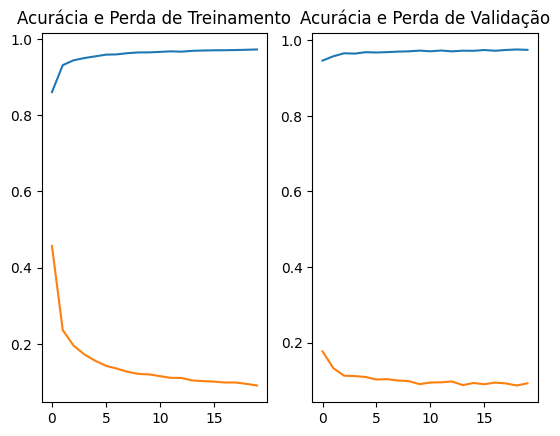

In [18]:
historico.history.keys() # Mostra as métricas disponíveis

plt.subplot(1, 2, 1) # ← (linhas, colunas, posição exibida 1)
plt.title('Acurácia e Perda de Treinamento') # Título do gráfico
plt.plot(historico.history['accuracy']) # Acurácia de treinamento
plt.plot(historico.history['loss']) # Perda de treinamento 

plt.subplot(1, 2, 2) # ← (linhas, colunas, posição exibida 2)
plt.title('Acurácia e Perda de Validação') # Título do gráfico
plt.plot(historico.history['val_accuracy']) # Acurácia de validação
plt.plot(historico.history['val_loss']) # Perda de validação

### Obter previsões:

In [19]:
previsoes = modelo.predict(X_teste) # Faz previsões com a partição de teste para avaliar o modelo 
previsoes

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[3.28778915e-09, 3.62624575e-09, 3.36466910e-05, ...,
        9.99950528e-01, 3.66337204e-11, 1.56653387e-05],
       [3.18219673e-09, 1.17445691e-03, 9.98679817e-01, ...,
        6.97384576e-06, 7.07281913e-08, 3.43307535e-11],
       [8.83446927e-11, 9.99982238e-01, 1.80028019e-06, ...,
        3.37255869e-06, 1.10600195e-05, 1.06281979e-08],
       ...,
       [1.12036137e-10, 3.22087287e-11, 2.03943662e-09, ...,
        2.58493628e-07, 1.80525091e-11, 2.40384725e-06],
       [5.22574760e-17, 4.36005509e-15, 2.22647354e-15, ...,
        2.75790984e-15, 3.15034998e-09, 7.19939343e-12],
       [1.27309727e-08, 1.85595718e-15, 2.09742779e-10, ...,
        1.77294065e-11, 4.38389602e-11, 7.24694718e-13]], dtype=float32)

In [20]:
previsoes = (previsoes > 0.5) # Converte as probabilidades em True (1) ou False (0)
previsoes

array([[False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

### Pegar o número de maior valor e gerar a Matriz de Confusão

O código tem como objetivo avaliar o desempenho de um modelo de classificação que prevê dígitos de 0 a 9. Para isso, ele gera uma matriz de confusão, que mostra o quão bem o modelo está classificando cada dígito.

In [21]:
y_teste_matriz = [np.argmax(t) for t in y_teste] # Converte as probabilidades em valores de 0 a 9
y_previsoes_matriz = [np.argmax(t) for t in previsoes] # Converte as probabilidades em valores de 0 a 9
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz) # Cria a matriz de confusão
confusao

array([[ 969,    1,    1,    0,    1,    2,    3,    1,    1,    1],
       [   4, 1124,    2,    1,    0,    1,    1,    1,    1,    0],
       [   5,    1, 1014,    3,    1,    0,    1,    5,    2,    0],
       [   5,    0,    2,  982,    0,   10,    0,    6,    5,    0],
       [   3,    0,    4,    0,  964,    0,    3,    2,    0,    6],
       [   8,    0,    0,   11,    1,  862,    4,    1,    3,    2],
       [   8,    3,    2,    1,    7,    5,  932,    0,    0,    0],
       [  12,    3,    8,    1,    0,    0,    0, 1000,    0,    4],
       [  15,    3,    2,    4,    4,    9,    5,    4,  927,    1],
       [  13,    6,    0,    2,   15,    2,    1,   11,    2,  957]])

### Fazer previsões reais a partir do modelo criado

In [22]:
print("[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]")
print(y_treinamento[0])
print('Número a prever: ', 5)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Número a prever:  5


In [23]:
novo = X_treinamento[0]  # Pega a primeira imagem da base de treinamento
novo = np.expand_dims(novo, axis=0)  # Adiciona uma dimensão extra para a predição
pred = modelo.predict(novo)  # Faz a predição
pred = [np.argmax(pred) for p in pred]  # Converte as probabilidades em valores de 0 a 9

pred = int(pred[0])  # Acessa o primeiro elemento da lista e converte para inteiro
print("O número previsto é:", pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
O número previsto é: 5
